# 1 Введение

## 1.1 Постановка задачи

**Заказчик** — федеральный оператор сотовой связи  
  
**Задача** -- клиентам предлагается два тарифных плана: «Смарт» и «Ультра»; необходимо понять, какой тариф приносит больше денег, чтобы скорректировать рекламный бюджет

## 1.2 Исходные данные

### 1.2.1 Описание тарифов

#### 1.2.1.1 Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
 - минута разговора: 3 рубля
 - сообщение: 3 рубля
 - 1 Гб интернет-трафика: 200 рублей

#### 1.2.1.2 Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
 - минута разговора: 1 рубль
 - сообщение: 1 рубль
 - 1 Гб интернет-трафика: 150 рублей

> **Внимание!** Заказчик всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### 1.2.2 Переданные файлы
- users.csv
- calls.csv
- messages.csv
- internet.csv
- tariffs.csv

### 1.2.3 Описание данных
В нашем распоряжении данные 500 пользователей Заказчика: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год

#### 1.2.3.1 Таблица *users* (информация о пользователях)
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

#### 1.2.3.2 Таблица *calls* (информация о звонках)
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

#### 1.2.3.3 Таблица *messages* (информация о сообщениях)
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

#### 1.2.3.4 Таблица *internet* (информация об интернет-сессиях)
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

#### 1.2.3.5 Таблица *tariffs* (информация о тарифах)
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## 1.3 План обработки и анализа данных

### 1.3.1 Подготовка данных
- обзор данных, обнаружение пропусков, преобразование типов данных;
- поиск и исправление ошибок в данных.

### 1.3.2 Дополнение набора данных
- добавить количество сделанных звонков и израсходованных минут разговора по месяцам;
- добавить количество отправленных сообщений по месяцам;
- добавить объем израсходованного интернет-трафика по месяцам;
- добавить помесячную выручку с каждого пользователя — вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану.

### 1.3.3 Анализ данных
- описать поведение клиентов оператора, исходя из выборки;
- определить сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц; посчитать для них среднее количество, дисперсию и стандартное отклонение; построить для них гистограммы; описать их распределения.

### 1.3.4 Проверка гипотез
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### 1.3.5 Вывод

## 1.4 Пользовательские функции

In [1]:
import pandas as pd
from numpy import mean, ceil, var
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

pd.options.display.float_format = '{:.2f}'.format

In [2]:
def check_col_for_index(df, column): # bool
    '''
    Функция проверки совпадения значений столбца со значениями индекса
    '''
    
    count = 0

    for i in df.index:
        if i != df.loc[i, column]: count += 1

    return (count == 0)

In [3]:
def value_counts_percent(column, ret=False):
    '''
    Функция вывода количества и процента от общего числа значений столбца
    '''
    temp_df = pd.DataFrame({
                'count':column.value_counts(),
                'percent': column.value_counts() / len(column) * 100})

    if ret: return temp_df
    else: print(temp_df)

In [4]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
SMART = 0
ULTRA = 1

def meaning(tariff, _users, _calls, _internet, _messages):
    #ежемесячная абонентская плата в рублях
    rub_monthly_fee = tariffs.loc[tariff, 'rub_monthly_fee']

    #количество минут разговора в месяц, включённых в абонентскую плату
    minutes_included = tariffs.loc[tariff, 'minutes_included']

    #количество сообщений в месяц, включённых в абонентскую плату
    messages_included = tariffs.loc[tariff, 'messages_included']

    #объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    mb_per_month_included = tariffs.loc[tariff, 'mb_per_month_included']

    #стоимость минуты разговора сверх тарифного пакета
    rub_per_minute = tariffs.loc[tariff, 'rub_per_minute']

    #стоимость отправки сообщения сверх тарифного пакета
    rub_per_message = tariffs.loc[tariff, 'rub_per_message']

    #стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
    rub_per_gb = tariffs.loc[tariff, 'rub_per_gb']

    for i in _users.index:

        user_id  = _users.loc[i, 'user_id']

        receipt = 0

        data = []
        user_calls = _calls.loc[_calls['user_id'] == user_id, :]    

        for month in months:
            mothtly_calls = ceil(user_calls.loc[pd.DatetimeIndex(user_calls['call_date']).month == month, 'duration'].sum())
            data.append(mothtly_calls)
            if (mothtly_calls - minutes_included) > 0:
                receipt += (mothtly_calls - minutes_included) * rub_per_minute

        _users.loc[i, 'mothtly_calls_mean'] = ceil(mean(data))

        data = []
        user_internet = _internet.loc[_internet['user_id'] == user_id, :]

        for month in months:
            mothtly_internet = ceil(user_internet.loc[pd.DatetimeIndex(user_internet['session_date']).month == month, 'mb_used'].sum())
            data.append(mothtly_internet)
            if (mothtly_internet - mb_per_month_included) > 0:
                receipt += ceil((mothtly_internet - mb_per_month_included) / 1024) * rub_per_gb

        _users.loc[i, 'mothtly_internet_mean'] = ceil(mean(data))

        data = []
        user_messages = _messages.loc[(_messages['user_id'] == user_id), :]

        for month in months:
            mothtly_messages = user_messages.loc[pd.DatetimeIndex(user_messages['message_date']).month == month, 'message_date'].count()
            data.append(mothtly_messages)
            if (mothtly_messages - messages_included) > 0:
                receipt += (mothtly_messages - messages_included) * rub_per_message

        _users.loc[i, 'mothtly_messages_mean'] = ceil(mean(data))

        _users.loc[i, 'receipt_mean'] = receipt / len(months) + rub_monthly_fee

    _users.reset_index(drop=True, inplace=True)
    
    return receipt + _users.shape[0] * rub_monthly_fee

In [5]:
def draw_graphs(column, SMART_title, ULTRA_title, mesurement):
    
    gs = GridSpec(2, 5, figure=plt.figure(constrained_layout=True, figsize=(15,8)))
    
    graphs = []

    graphs.append(plt.subplot(gs.new_subplotspec((0, 0), colspan=1, rowspan=2)))
    graphs[0].boxplot(users_smart[column])
    graphs[0].set_title(SMART_title)
    graphs[0].set_ylabel(mesurement)

    graphs.append(plt.subplot(gs.new_subplotspec((0, 1), colspan=1, rowspan=2)))
    graphs[1].boxplot(users_ultra[column])
    graphs[1].set_title(ULTRA_title)
    graphs[1].set_ylabel(mesurement)

    graphs.append(plt.subplot(gs.new_subplotspec((0, 2), colspan=2, rowspan=1)))
    graphs[2].hist(users_smart[column], alpha=0.7)
    _mean = users_smart[column].mean()
    _median = users_smart[column].median()
    _, _xmax = plt.xlim()
    _, _ymax = plt.ylim()
    plt.axvline(_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(_median, color='green', linestyle='dashed', linewidth=2)
    plt.text(_xmax*0.75, _ymax*0.93, 'mean: {:.2f}'.format(_mean), color='red', ma='right')
    plt.text(_xmax*0.75, _ymax*0.88, 'median: {:.2f}'.format(_median), color='green', ma='right')
    graphs[2].set_title(SMART_title)
    graphs[2].set_xlabel(mesurement)
    graphs[2].set_ylabel('Количество')

    graphs.append(plt.subplot(gs.new_subplotspec((1, 2), colspan=2, rowspan=1)))
    graphs[3].hist(users_ultra[column], alpha=0.7)
    _mean = users_ultra[column].mean()
    _median = users_ultra[column].median()
    _, _xmax = plt.xlim()
    _, _ymax = plt.ylim()
    plt.axvline(_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(_median, color='green', linestyle='dashed', linewidth=2)
    plt.text(_xmax*0.75, _ymax*0.93, 'mean: {:.2f}'.format(_mean), color='red', ma='right')
    plt.text(_xmax*0.75, _ymax*0.88, 'median: {:.2f}'.format(_median), color='green', ma='right')
    graphs[3].set_title(ULTRA_title)
    graphs[3].set_xlabel(mesurement)
    graphs[3].set_ylabel('Количество')

    graphs.append(plt.subplot(gs.new_subplotspec((0, 4), colspan=1, rowspan=1)))
    graphs[4].scatter(users_smart.index, users_smart[column], alpha=0.3)
    graphs[4].set_title(SMART_title)
    graphs[4].set_xlabel('Пользователи')
    graphs[4].set_ylabel(mesurement)

    graphs.append(plt.subplot(gs.new_subplotspec((1, 4), colspan=1, rowspan=1)))
    graphs[5].scatter(users_ultra.index, users_ultra[column], alpha=0.3)
    graphs[5].set_title(ULTRA_title)
    graphs[5].set_xlabel('Пользователи')
    graphs[5].set_ylabel(mesurement)

    plt.show()

In [6]:
def over_contents_print(tariff, df, column, content_limit):
    print(tariff, ', over limit clients: ', df.loc[df[column] > content_limit, 'user_id'].count(),
          ' (', df.loc[df[column] > content_limit, 'user_id'].count() / df.shape[0] * 100, ' %)', sep='')
    print(tariff, ', over limit content: ', df.loc[df[column] > content_limit, column].sum(), 
          ' (', df.loc[df[column] > content_limit, column].sum() / df[column].sum() * 100, ' %)', sep='')

In [7]:
def peceipt_graphs():

    gs = GridSpec(2, 3, figure=plt.figure(constrained_layout=True, figsize=(15,8)))

    graphs = []

    graphs.append(plt.subplot(gs.new_subplotspec((0, 0), colspan=1, rowspan=1)))
    graphs[0].hist(users_smart['receipt_mean'], alpha=0.7)
    _mean = users_smart['receipt_mean'].mean()
    _median = users_smart['receipt_mean'].median()
    _, _xmax = plt.xlim()
    _, _ymax = plt.ylim()
    plt.axvline(_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(_median, color='green', linestyle='dashed', linewidth=2)
    plt.text(_xmax*0.75, _ymax*0.93, 'mean: {:.2f}'.format(_mean), color='red', ma='right')
    plt.text(_xmax*0.75, _ymax*0.88, 'median: {:.2f}'.format(_median), color='green', ma='right')
    graphs[0].set_title('SMART, выручка всех пользователей, руб.')
    graphs[0].set_xlabel('Выручка, руб.')
    graphs[0].set_ylabel('Количество')

    graphs.append(plt.subplot(gs.new_subplotspec((0, 1), colspan=1, rowspan=1)))
    graphs[1].hist(users_smart_mos['receipt_mean'], alpha=0.7)
    _mean = users_smart_mos['receipt_mean'].mean()
    _median = users_smart_mos['receipt_mean'].median()
    _, _xmax = plt.xlim()
    _, _ymax = plt.ylim()
    plt.axvline(_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(_median, color='green', linestyle='dashed', linewidth=2)
    plt.text(_xmax*0.75, _ymax*0.93, 'mean: {:.2f}'.format(_mean), color='red', ma='right')
    plt.text(_xmax*0.75, _ymax*0.88, 'median: {:.2f}'.format(_median), color='green', ma='right')
    graphs[1].set_title('SMART, выручка пользователей из Москвы, руб.')
    graphs[1].set_xlabel('Выручка, руб.')
    graphs[1].set_ylabel('Количество')

    graphs.append(plt.subplot(gs.new_subplotspec((0, 2), colspan=1, rowspan=1)))
    graphs[2].hist(users_smart_nonmos['receipt_mean'], alpha=0.7)
    _mean = users_smart_nonmos['receipt_mean'].mean()
    _median = users_smart_nonmos['receipt_mean'].median()
    _, _xmax = plt.xlim()
    _, _ymax = plt.ylim()
    plt.axvline(_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(_median, color='green', linestyle='dashed', linewidth=2)
    plt.text(_xmax*0.75, _ymax*0.93, 'mean: {:.2f}'.format(_mean), color='red', ma='right')
    plt.text(_xmax*0.75, _ymax*0.88, 'median: {:.2f}'.format(_median), color='green', ma='right')
    graphs[2].set_title('SMART, выручка пользователей из регионов, руб.')
    graphs[2].set_xlabel('Выручка, руб.')
    graphs[2].set_ylabel('Количество')

    graphs.append(plt.subplot(gs.new_subplotspec((1, 0), colspan=1, rowspan=1)))
    graphs[3].hist(users_ultra['receipt_mean'], alpha=0.7, bins=3)
    _mean = users_ultra['receipt_mean'].mean()
    _median = users_ultra['receipt_mean'].median()
    _, _xmax = plt.xlim()
    _, _ymax = plt.ylim()
    plt.axvline(_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(_median, color='green', linestyle='dashed', linewidth=2)
    plt.text(_xmax*0.89, _ymax*0.93, 'mean: {:.2f}'.format(_mean), color='red', ma='right')
    plt.text(_xmax*0.89, _ymax*0.88, 'median: {:.2f}'.format(_median), color='green', ma='right')
    graphs[3].set_title('ULTRA, выручка всех пользователей, руб.')
    graphs[3].set_xlabel('Выручка, руб.')
    graphs[3].set_ylabel('Количество')

    graphs.append(plt.subplot(gs.new_subplotspec((1, 1), colspan=1, rowspan=1)))
    graphs[4].hist(users_ultra_mos['receipt_mean'], alpha=0.7, bins=3)
    _mean = users_ultra_mos['receipt_mean'].mean()
    _median = users_ultra_mos['receipt_mean'].median()
    _, _xmax = plt.xlim()
    _, _ymax = plt.ylim()
    plt.axvline(_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(_median, color='green', linestyle='dashed', linewidth=2)
    plt.text(_xmax*0.93, _ymax*0.93, 'mean: {:.2f}'.format(_mean), color='red', ma='right')
    plt.text(_xmax*0.93, _ymax*0.88, 'median: {:.2f}'.format(_median), color='green', ma='right')
    graphs[4].set_title('ULTRA, выручка пользователей из Москвы, руб.')
    graphs[4].set_xlabel('Выручка, руб.')
    graphs[4].set_ylabel('Количество')

    graphs.append(plt.subplot(gs.new_subplotspec((1, 2), colspan=1, rowspan=1)))
    graphs[5].hist(users_ultra_nonmos['receipt_mean'], alpha=0.7, bins=3)
    _mean = users_ultra_nonmos['receipt_mean'].mean()
    _median = users_ultra_nonmos['receipt_mean'].median()
    _, _xmax = plt.xlim()
    _, _ymax = plt.ylim()
    plt.axvline(_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(_median, color='green', linestyle='dashed', linewidth=2)
    plt.text(_xmax*0.89, _ymax*0.93, 'mean: {:.2f}'.format(_mean), color='red', ma='right')
    plt.text(_xmax*0.89, _ymax*0.88, 'median: {:.2f}'.format(_median), color='green', ma='right')
    graphs[5].set_title('ULTRA, выручка пользователей из регионов, руб.')
    graphs[5].set_xlabel('Выручка, руб.')
    graphs[5].set_ylabel('Количество')

    plt.show()

# 2 Основная часть

## 2.1 Предобработка данных

### 2.1.1 Обзор данных, удаление *null*-значений, преобразование типов данных

#### 2.1.1.1 Таблица *users*

In [8]:
users = pd.read_csv('users.csv')

In [9]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

1. Столбец *churn_date* имеет пропуски, которые должны быть удалены. Тип данных столбца необходимо заменить на *DateTime*.
2. Тип данных столбца *reg_date* должен буть заменен на *DateTime*

In [12]:
# Удаление пропусков в столбце churn_date
users.fillna(0, inplace=True)

In [13]:
# Замена типа данных столбца churn_date на DateTime
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,1970-01-01,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,1970-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,1970-01-01,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,1970-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,1970-01-01,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,1970-01-01,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,1970-01-01,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Будем иметь ввиду, что *churn_date* равная '1970-01-01' говорит о том, что абонент от оператора свзяи не ушёл

In [14]:
# Замена типа данных столбца reg_date на DateTime
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  500 non-null    datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


***Промежуточный итог***  
  
На данном этапе предобработки данных в таблице *users*:
- были удалены пропуски в столбце *churn_date*, тип данных столбца заменён на *DateTime*;
- тип данных столбца *reg_date* был заменен на *DateTime*.

#### 2.1.1.2 Таблица *calls*

In [15]:
calls = pd.read_csv('calls.csv')

In [16]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [17]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропуски отсутствуют, переименовывать столбцы не требуется

In [18]:
type(calls.loc[0, 'call_date'])

str

Тип данных столбца *call_date* необходимо преобразовать к *DateTime*

In [19]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


***Промежуточный итог***  
  
На данном этапе предобработки данных в таблице *calls*:
- тип данных столбца *call_date* был заменен на *DateTime*.

#### 2.1.1.3 Таблица *internet*

In [20]:
internet = pd.read_csv('internet.csv')

In [21]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [22]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Пропуски отсутствуют, переименовывать столбцы не требуется

In [23]:
check_col_for_index(internet, internet.columns[0])

True

Столбец *Unnamed 0* повторяет значения индексов набора данных, поэтому может быть удален

In [24]:
internet = internet.drop(internet.columns[[0]], axis='columns')
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [25]:
type(internet.loc[0, 'session_date'])

str

Тип данных столбца *session_date* необходимо преобразовать к *DateTime*

In [26]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


***Промежуточный итог***  
  
На данном этапе предобработки данных в таблице *internet*:
- столбец *Unnamed 0* был удален;
- тип данных столбца *session_date* был заменен на *DateTime*.

#### 2.1.1.4 Таблица *messages*

In [27]:
messages = pd.read_csv('messages.csv')

In [28]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [29]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Пропуски отсутствуют, переименовывать столбцы не требуется

In [30]:
type(messages.loc[0, 'message_date'])

str

Тип данных столбца *message_date* необходимо преобразовать к *DateTime*

In [31]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


***Промежуточный итог***  
  
На данном этапе предобработки данных в таблице *messages*:
- тип данных столбца *message_date* был заменен на *DateTime*.

#### 2.1.1.5 Таблица *tariffs*

In [32]:
tariffs = pd.read_csv('tariffs.csv')

In [33]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Пропуски отсутствуют, переименовывать столбцы не требуется.  

***Промежуточный итог***  
  
Таблица *tariffs* предобработки не требует.

### 2.1.2 Поиск и удаление аномальных значений

#### 2.1.2.1 Таблица *users*

In [34]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,1970-01-01,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,1970-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,1970-01-01,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,1970-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,1970-01-01,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,1970-01-01,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,1970-01-01,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [35]:
len(users['user_id'].unique())

500

Значения идентификаторов уникальны

In [36]:
# Массив ID пользователей для последующего анализа
user_ids = users['user_id'].unique()

In [37]:
users['age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75], dtype=int64)

In [38]:
users['reg_date'].describe()

count                     500
unique                    270
top       2018-05-28 00:00:00
freq                        8
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: reg_date, dtype: object

In [39]:
users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

***Промежуточный итог***  
  
Аномальные значения в таблице *users* отсутствуют.

#### 2.1.2.2 Таблица *calls*

In [40]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [41]:
len(calls['id'].unique())

202607

Значения идентификаторов уникальны

In [42]:
calls['call_date'].describe()

count                  202607
unique                    365
top       2018-12-31 00:00:00
freq                     1435
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object

In [43]:
calls['duration'].describe()

count   202607.00
mean         6.76
std          5.84
min          0.00
25%          1.30
50%          6.00
75%         10.70
max         38.00
Name: duration, dtype: float64

Нулевая длительность вызова -- аномальное значение

In [44]:
calls.loc[calls['duration'] == 0, 'duration'].count() 

39613

In [45]:
calls.loc[calls['duration'] == 0, 'duration'].count() / calls.shape[0] * 100

19.551644316336553

Нулевых вывзовов в наборе данных почти 20%. Удалять их пока нельзя

In [46]:
calls.loc[~calls['user_id'].isin(user_ids),:]

,id,call_date,duration,user_id


Ссылки на идентификаторы пользователей корректны

In [47]:
len(calls.loc[calls['duration'] == 0, 'user_id'].unique())

492

У всех пользвателей (за исключением 8) были нулевые вызовы. Значит это явление характерное для всех

In [48]:
value_counts_percent(calls.loc[calls['duration'] == 0, 'user_id'])

      count  percent
1377    336     0.85
1168    308     0.78
1453    295     0.74
1375    290     0.73
1196    262     0.66
...     ...      ...
1016      6     0.02
1084      5     0.01
1406      5     0.01
1424      5     0.01
1442      5     0.01

[492 rows x 2 columns]


Нулевые вызовы представляют интерес для дополнительного исследования, выходящего за рамки текщих задач. Их количество у каждого из пользователей не превышает 1%. Поэтому они могут быть удалены, как ошибочное значения, не смотря на суммарное их количество равное почти 20% от набора данных. 

In [49]:
calls = calls.loc[calls['duration'] != 0,:]
calls['duration'].describe()

count   162994.00
mean         8.40
std          5.35
min          0.01
25%          4.17
50%          7.74
75%         11.85
max         38.00
Name: duration, dtype: float64

In [50]:
calls.loc[calls['duration'] < 0.1, 'user_id'].count() / calls.shape[0] * 100

0.4552314809134078

Записи в наборе данных с длительностью вызова менее 6 сек составляют менее 0.5% от объема набра данных. Поэтому также могут быть удалены.

In [51]:
calls = calls.loc[calls['duration'] > 0.1,:]
calls['duration'].describe()

count   162176.00
mean         8.44
std          5.33
min          0.11
25%          4.23
50%          7.77
75%         11.88
max         38.00
Name: duration, dtype: float64

***Промежуточный итог***  
  
Аномальными значениями в таблице *calls* были вывзовы длительностью менее 6 секунд, которые из набора данных успешно удалены.

#### 2.1.2.3 Таблица *internet*

In [52]:
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [53]:
len(internet['id'].unique())

149396

Значения идентификаторов уникальны

In [54]:
internet['mb_used'].describe()

count   149396.00
mean       370.19
std        278.30
min          0.00
25%        138.19
50%        348.01
75%        559.55
max       1724.83
Name: mb_used, dtype: float64

In [55]:
internet.loc[internet['mb_used'] == 0, 'mb_used'].count() / internet.shape[0] * 100

13.118155773916303

Пользователи иногда не используют Интернет? Да, такое может быть

In [56]:
internet['session_date'].describe()

count                  149396
unique                    365
top       2018-12-31 00:00:00
freq                     1057
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: session_date, dtype: object

Аномальные значения отсутствуют

In [57]:
internet.loc[~internet['user_id'].isin(user_ids),:]

,id,mb_used,session_date,user_id


Ссылки на идентификаторы пользователей корректны

***Промежуточный итог***  
  
Аномальные значения в таблице *internet* отсутствуют.

#### 2.1.2.4 Таблица *messages*

In [58]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [59]:
len(messages['id'].unique())

123036

Значения идентификаторов уникальны

In [60]:
messages['message_date'].describe()

count                  123036
unique                    364
top       2018-12-31 00:00:00
freq                      859
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object

Аномальные значения отсутствуют

In [61]:
messages.loc[~messages['user_id'].isin(user_ids),:]

,id,message_date,user_id


Ссылки на идентификаторы пользователей корректны

***Промежуточный итог***  
  
Аномальные значения в таблице *messages* отсутствуют.

#### 2.1.2.5 Таблица *tariffs*

In [62]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


***Промежуточный итог***  
  
Аномальные значения в таблице *tariffs* отсутствуют.

## 2.2 Анализ данных

In [63]:
# Выделение пользователй и связанных с ними данных, использующих тариф smart

users_id_smart = users.loc[users['tariff'] == 'smart', 'user_id'].unique()

print('"Smart" users count:', len(users_id_smart))

users_smart = users.loc[users['user_id'].isin(users_id_smart), :]
calls_smart = calls.loc[calls['user_id'].isin(users_id_smart), :]
internet_smart = internet.loc[internet['user_id'].isin(users_id_smart), :]
messages_smart = messages.loc[messages['user_id'].isin(users_id_smart), :]

"Smart" users count: 351


Для простоты и удобства анализа выделим средние месячные значения количества разговоров, общей длительности разговоров, объема израсходованного трафика и СМС для каждого пользователя по обоим тарифам.

In [64]:
# Определение среднего количества контента и выручки по каждому месяцу для каждого абонента тарифа smart

SMART_receipt_total = meaning(SMART, users_smart, calls_smart, internet_smart, messages_smart)

g:\Anaconda\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
g:\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [65]:
users_smart

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mothtly_calls_mean,mothtly_internet_mean,mothtly_messages_mean,receipt_mean
0,1001,41,1970-01-01,Москва,Иван,Ежов,2018-11-01,smart,67.00,2706.00,0.00,600.00
1,1002,59,1970-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,120.00,9671.00,6.00,833.33
2,1005,67,1970-01-01,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,521.00,8308.00,46.00,753.75
3,1006,21,1970-01-01,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,275.00,13683.00,0.00,900.00
4,1007,65,1970-01-01,Москва,Юна,Березина,2018-04-19,smart,346.00,10970.00,19.00,793.08
...,...,...,...,...,...,...,...,...,...,...,...,...
346,1494,62,1970-01-01,Омск,Ренат,Андропов,2018-08-17,smart,153.00,6417.00,0.00,733.33
347,1496,36,1970-01-01,Вологда,Трифон,Блохин,2018-01-27,smart,473.00,22579.00,39.00,2308.33
348,1497,32,1970-01-01,Челябинск,Каролина,Агеева,2018-10-09,smart,111.00,3799.00,5.00,637.33
349,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,102.00,6203.00,14.00,919.67


In [66]:
# Выделение пользователй и связанных с ними данных, использующих тариф ultra

users_id_ultra = users.loc[users['tariff'] == 'ultra', 'user_id'].unique()

print('"Ultra" users count:', len(users_id_ultra))

users_ultra = users.loc[users['user_id'].isin(users_id_ultra), :]
calls_ultra = calls.loc[calls['user_id'].isin(users_id_ultra), :]
internet_ultra = internet.loc[internet['user_id'].isin(users_id_ultra), :]
messages_ultra = messages.loc[messages['user_id'].isin(users_id_ultra), :]

"Ultra" users count: 149


In [67]:
# Определение среднего количества контента по каждому месяцу для каждого абонента тарифа ultra

ULTRA_receipt_total = meaning(ULTRA, users_ultra, calls_ultra, internet_ultra, messages_ultra)

g:\Anaconda\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
g:\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [68]:
users_ultra

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mothtly_calls_mean,mothtly_internet_mean,mothtly_messages_mean,receipt_mean
0,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,202.00,8950.00,42.00,1950.00
1,1003,23,1970-01-01,Москва,Белла,Белякова,2018-08-17,ultra,301.00,4774.00,32.00,1950.00
2,1004,68,1970-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,78.00,12421.00,100.00,1950.00
3,1013,36,1970-01-01,Иваново,Борис,Андреенко,2018-11-14,ultra,74.00,2544.00,4.00,1950.00
4,1016,58,1970-01-01,Омск,Марица,Сазонова,2018-11-21,ultra,10.00,2235.00,12.00,1950.00
...,...,...,...,...,...,...,...,...,...,...,...,...
144,1476,50,1970-01-01,Москва,Валентина,Семенова,2018-04-30,ultra,332.00,12525.00,4.00,1950.00
145,1485,34,1970-01-01,Киров,Таисия,Сухова,2018-12-29,ultra,46.00,1952.00,13.00,1950.00
146,1491,56,1970-01-01,Челябинск,Радислав,Андрейкин,2018-04-25,ultra,363.00,13456.00,36.00,1950.00
147,1493,71,1970-01-01,Красноярск,Таисия,Ахматулина,2018-11-24,ultra,59.00,4536.00,8.00,2100.00


In [69]:
users_smart_describe = users_smart.describe().drop(['user_id'], axis='columns')
users_smart_describe.loc['var', 'age'] = '-'
users_smart_describe.loc['var', 'mothtly_calls_mean'] = var(users_smart['mothtly_calls_mean'])
users_smart_describe.loc['var', 'mothtly_internet_mean'] = var(users_smart['mothtly_internet_mean'])
users_smart_describe.loc['var', 'mothtly_messages_mean'] = var(users_smart['mothtly_messages_mean'])
users_smart_describe.loc['var', 'receipt_mean'] = var(users_smart['receipt_mean'])
users_smart_describe

,age,mothtly_calls_mean,mothtly_internet_mean,mothtly_messages_mean,receipt_mean
count,351.00,351.00,351.00,351.00,351.00
mean,46.46,209.43,8578.23,17.97,924.45
std,16.58,137.88,5029.98,18.61,343.14
min,18.00,0.00,0.00,0.00,550.00
25%,32.00,101.00,4319.50,4.00,658.29
50%,47.00,182.00,8137.00,12.00,833.33
75%,62.00,300.00,11999.50,27.00,1104.33
max,75.00,674.00,22579.00,91.00,2308.33
var,-,18956.76,25228574.79,345.31,117412.60


In [70]:
users_ultra_describe = users_ultra.describe().drop(['user_id'], axis='columns')
users_ultra_describe.loc['var', 'age'] = '-'
users_ultra_describe.loc['var', 'mothtly_calls_mean'] = var(users_ultra['mothtly_calls_mean'])
users_ultra_describe.loc['var', 'mothtly_internet_mean'] = var(users_ultra['mothtly_internet_mean'])
users_ultra_describe.loc['var', 'mothtly_messages_mean'] = var(users_ultra['mothtly_messages_mean'])
users_ultra_describe.loc['var', 'receipt_mean'] = var(users_ultra['receipt_mean'])
users_ultra_describe

,age,mothtly_calls_mean,mothtly_internet_mean,mothtly_messages_mean,receipt_mean
count,149.00,149.00,149.00,149.00,149.00
mean,46.90,274.53,10725.96,27.50,2016.19
std,16.92,211.64,7341.04,28.19,157.47
min,18.00,0.00,0.00,0.00,1950.00
25%,31.00,91.00,4954.00,5.00,1950.00
50%,46.00,251.00,8951.00,21.00,1950.00
75%,63.00,391.00,14582.00,39.00,1975.00
max,75.00,1022.00,31367.00,122.00,2862.50
var,-,44489.22,53529184.94,789.14,24629.83


Данные этих таблиц говорят о том, что пользователи тарифа ULTRA разговаривают, расходуют трафик и СМС больше пользователей тарифа SMART, средняя выручка тарифа ULTRA больше средней выручки тарифа SMART.

### 2.2.1 Средняя длительность разговоров  

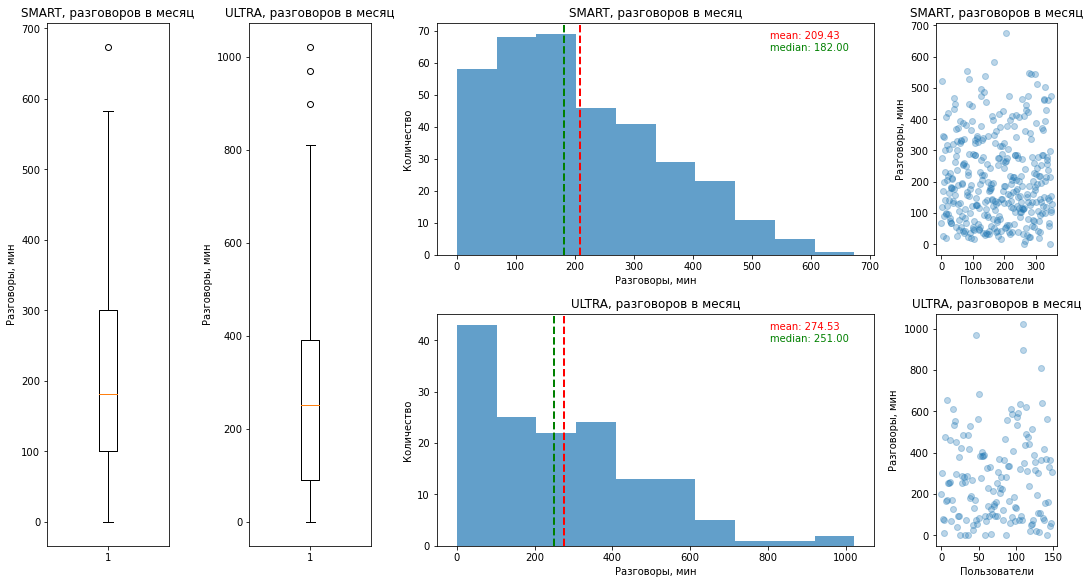

In [71]:
# Сравнительное отображение средней длительности разговоров

draw_graphs('mothtly_calls_mean', 'SMART, разговоров в месяц', 'ULTRA, разговоров в месяц', 'Разговоры, мин')

In [72]:
over_contents_print('SMART', users_smart, 'mothtly_calls_mean', 500)

SMART, over limit clients: 11 (3.133903133903134 %)
SMART, over limit content: 6046.0 (8.224731329070876 %)


Пользователи тарифа SMART в подавляющем большинстве разговаривают в среднем до 200 минут в месяц. При этом 11 пользователей (3% от общего числа) в среднем тратят на разговоры в месяц минут больше, чем предусмотрено в тарифе. Это превышение составляет в среднем 8% от общей суммы всех разговоров.
  
Пользователи тарифа ULTRA в подавляющем большинстве разговаривают до 400 минут в месяц, при этом пользователи, которые выходили бы за лимиты тарифа по разговорам отсутствуют.

### 2.2.2 Среднее количество трафика

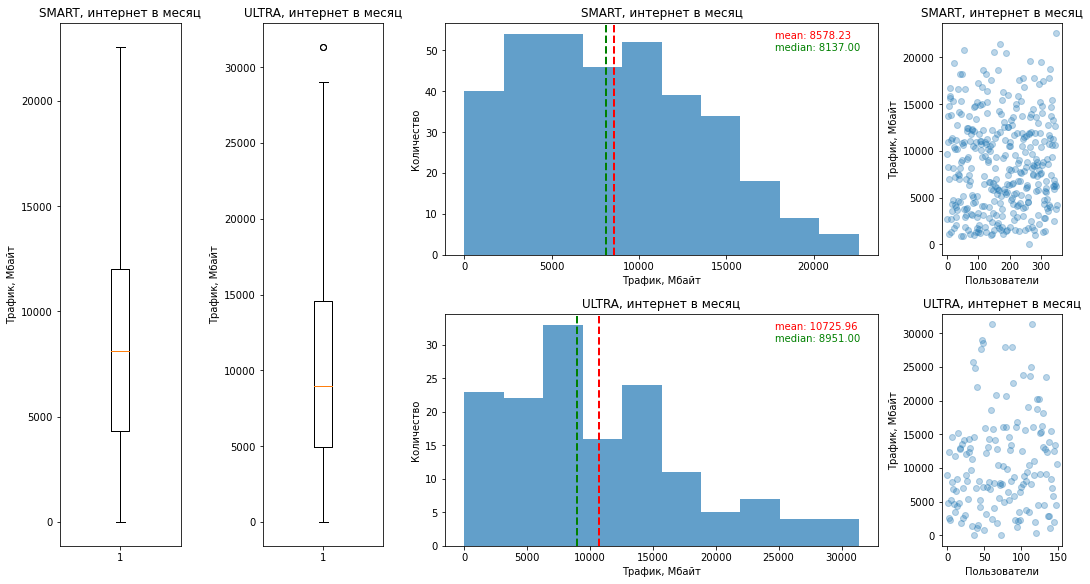

In [73]:
# Сравнительное отображение среднего количества трафика

draw_graphs('mothtly_internet_mean', 'SMART, интернет в месяц', 'ULTRA, интернет в месяц', 'Трафик, Мбайт')

In [74]:
over_contents_print('SMART', users_smart, 'mothtly_internet_mean', 15000)

SMART, over limit clients: 43 (12.250712250712251 %)
SMART, over limit content: 748053.0 (24.844335361479395 %)


In [75]:
over_contents_print('ULTRA', users_ultra, 'mothtly_internet_mean', 30000)

ULTRA, over limit clients: 2 (1.342281879194631 %)
ULTRA, over limit content: 62721.0 (3.924556116753683 %)


Пользователи тарифа SMART активно используют интеренет -- подавляющее количество пользователей в среднем расходуют трафик до 15 ГБ в месяц. При этом 12% пользователей от общего их числа тратят трафика в месяц больше, чем предусмотрено в тарифе. Это превышение составляет в среднем почти 25% от общего объёма всего трафика.
  
Пользователи тарифа ULTRA используют интернет меньше, основная масса -- в среднем в пределах 15 ГБ (из 30 ГБ предусмотренных в тарифе). При этом 1% пользователей от общего их числа тратят трафика в месяц больше, чем предусмотрено в тарифе. Это превышение составляет в среднем почти 4% от общего объёма всего трафика.

### 2.2.3 Среднее количество СМС

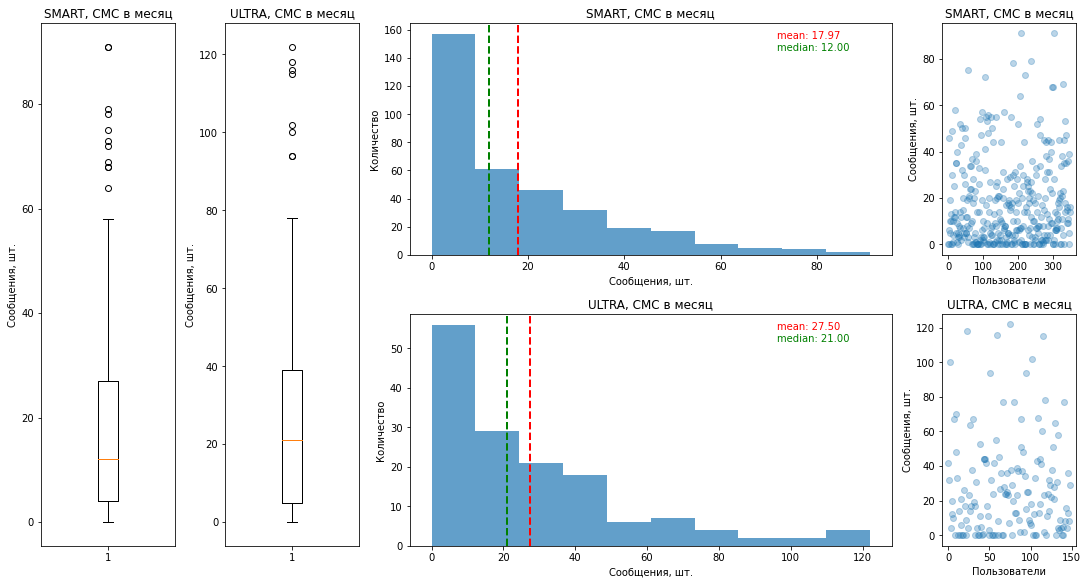

In [76]:
# Сравнительное отображение среднего количества СМС

draw_graphs('mothtly_messages_mean', 'SMART, СМС в месяц', 'ULTRA, СМС в месяц', 'Сообщения, шт.')

In [77]:
print('Over limit clients:', users_smart.loc[users_smart['mothtly_messages_mean'] > 50, 'user_id'].count(), '(',
      users_smart.loc[users_smart['mothtly_messages_mean'] > 50, 'user_id'].count() / users_smart.shape[0] * 100, '% )')
print('Over limit SMS:', users_smart.loc[users_smart['mothtly_messages_mean'] > 50, 'mothtly_messages_mean'].sum(),
      '(',  users_smart.loc[users_smart['mothtly_messages_mean'] > 50, 'mothtly_messages_mean'].sum()
          / users_smart['mothtly_messages_mean'].sum() * 100, '% )')

Over limit clients: 26 ( 7.4074074074074066 % )
Over limit SMS: 1646.0 ( 26.089713108258046 % )


Пользователи тарифа SMART в подавляющем большинстве пересылают до 30 СМС в месяц. При этом 7% пользователей от их общего числа тратят СМС больше, чем предусмотрено в тарифе. Это превышение составляет 26% от общего количества всех СМС.
  
Пользователи тарифа ULTRA также в подавляющем большинстве пересылают до 50 СМС в месяц, при этом пользователи, которые выходили бы за лимиты тарифа по количеству СМС отсутствуют.

### 2.2.4 Средняя выручка

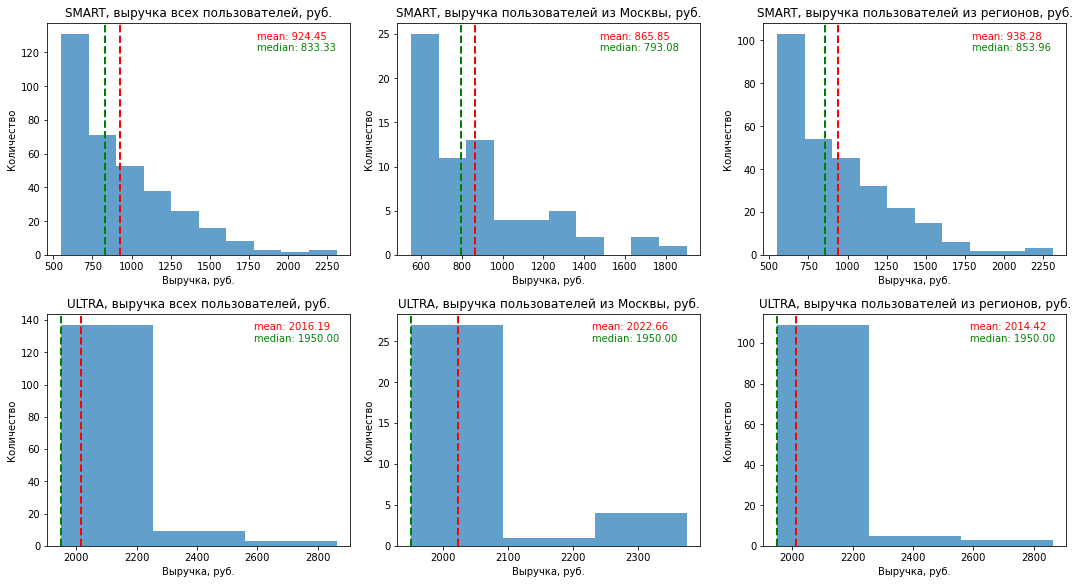

In [78]:
users_smart_mos = users_smart.loc[users_smart['city'] == 'Москва', :]
users_ultra_mos = users_ultra.loc[users_ultra['city'] == 'Москва', :]

users_smart_nonmos = users_smart.loc[users_smart['city'] != 'Москва', :]
users_ultra_nonmos = users_ultra.loc[users_ultra['city'] != 'Москва', :]

peceipt_graphs()

Средняя выручка тарифа ULTRA выше средней выручки тарифа SMART. При этом средняя выручка пользователей из Москвы для тарифа ULTRA наибольшая из всех. Средняя выручка пользователей тарифа SMART из Москвы ниже средней выручки пользоателей данного тарифа из регионов. Картина ожидаемая -- максимальная выручка дорого тарифа приходится на пользовоталей из Москвы

***Промежуточный итог***  
  
По итогам проведённого анализа можно сделать следующие выводы:

- пользователи тарифа SMART в подавляющем большинстве разговаривают в среднем до 200 минут в месяц; при этом 11 пользователей (3% от общего числа) в среднем тратят на разговоры в месяц минут больше, чем предусмотрено в тарифе; это превышение составляет в среднем 8% от общей суммы всех разговоров; пользователи тарифа ULTRA в подавляющем большинстве разговаривают до 400 минут в месяц, при этом пользователи, которые выходили бы за лимиты тарифа по разговорам отсутствуют;

- пользователи тарифа SMART активно используют интеренет -- подавляющее количество пользователей в среднем расходуют трафик до 15 ГБ в месяц; при этом 12% пользователей от общего их числа тратят трафика в месяц больше, чем предусмотрено в тарифе; это превышение составляет в среднем почти 25% от общего объёма всего трафика; пользователи тарифа ULTRA используют интернет меньше, основная масса -- в среднем в пределах 15 ГБ (из 30 ГБ предусмотренных в тарифе); при этом 1% пользователей от общего их числа тратят трафика в месяц больше, чем предусмотрено в тарифе; это превышение составляет в среднем почти 4% от общего объёма всего трафика.

- пользователи тарифа SMART в подавляющем большинстве в среднем пересылают до 30 СМС в месяц. При этом 7% пользователей от их общего числа тратят СМС больше, чем предусмотрено в тарифе. Это превышение составляет в среднем 26% от общего количества всех СМС; пользователи тарифа ULTRA в подавляющем большинстве в среднем пересылают до 50 СМС в месяц, при этом пользователи, которые выходили бы за лимиты тарифа по количеству СМС отсутствуют.

## 2.3 Проверка гипотез

In [79]:
print('Полная выручка по тарифу SMART:',SMART_receipt_total)
print('Полная выручка по тарифу ULTRA:',ULTRA_receipt_total)
print('Средняя выручка пользователей тарифа SMART: {:.2f}'.format(users_smart['receipt_mean'].describe()['mean']))
print('Средняя выручка пользователей тарифа ULTRA: {:.2f}'.format(users_ultra['receipt_mean'].describe()['mean']))
print('Средняя выручка пользователей тарифа SMART из Москвы: {:.2f}'.format(users_smart_mos['receipt_mean'].describe()['mean']))
print('Средняя выручка пользователей тарифа ULTRA из Москвы: {:.2f}'.format(users_ultra_mos['receipt_mean'].describe()['mean']))
print('Средняя выручка пользователей тарифа SMART из регионов: {:.2f}'.format(users_smart_nonmos['receipt_mean'].describe()['mean']))
print('Средняя выручка пользователей тарифа ULTRA из регионов: {:.2f}'.format(users_ultra_nonmos['receipt_mean'].describe()['mean']))

Полная выручка по тарифу SMART: 194556.0
Полная выручка по тарифу ULTRA: 292350.0
Средняя выручка пользователей тарифа SMART: 924.45
Средняя выручка пользователей тарифа ULTRA: 2016.19
Средняя выручка пользователей тарифа SMART из Москвы: 865.85
Средняя выручка пользователей тарифа ULTRA из Москвы: 2022.66
Средняя выручка пользователей тарифа SMART из регионов: 938.28
Средняя выручка пользователей тарифа ULTRA из регионов: 2014.42


Из проведенного выше анализа тариф ULTRA принёс Заказчику большую вырочку, средние выручки тарифа также больше аналогичных тарифа SMART. Переданные нам данные являются выборками из общего числа всех абонентов тарифов (генеральных совокупностей). Чтобы с уверенностью сказать какой из тарифов выгоднее, какой из них приносит больше выручки, необхдимо проверить есть ли статистически значимое различие между средними значениями генеральных совокупностей пользователей двух тарифов. Данную проверку можно осуществить проверив **нулевую гипотезу**:  
  
$$
{H_0}^1: \mu_1 = \mu_2,\\
$$
  
Тогда **альтернативная гипотеза** примет вид:  

$$
{H_1}^1: \mu_1 \neq \mu_2,\\
$$

Нулевые и альтернативные гипотезы о равенстве средних значений вырички пользователей из Москвы и регионов примут вид:

$$
{H_0}^2: \mu_1^1 = \mu_1^2\\
{H_0}^3: \mu_2^1 = \mu_2^2\\  
{H_1}^2: \mu_1^1 \neq \mu_1^2\\
{H_1}^3: \mu_2^1 \neq \mu_2^2\\
$$
где:  
$\mu_1$ - среднее значение выручки по пользователям тарифа SMART,  
$\mu_2$ - среднее значение выручки по пользователям тарифа ULTRA,  
$\mu_1^1$ - среднее значение выручки по пользователям тарифа SMART из Москвы,  
$\mu_1^2$ - среднее значение выручки по пользователям тарифа SMART из регионов,  
$\mu_2^1$ - среднее значение выручки по пользователям тарифа ULTRA из Москвы,  
$\mu_2^2$ - среднее значение выручки по пользователям тарифа ULTRA из регионов
  
Для проверки нулевых гипотез необходимо посчитать ***р-уровень*** значимости для статистического различия средних двух генеральных совокупностей по имеющимся у нас выборкам. В соответствии с теорией, поскольку размер выборки значительно больше 30, значимым ***р-уровнем*** ($\alpha$) можно считать величину 0.05 (5%), поскольку t-распределение средних значений выборок стремиться к нормальному.

In [80]:
from scipy import stats as st
import pandas as pd

alpha = 0.05

results_1 = st.ttest_ind(users_smart['receipt_mean'], users_ultra['receipt_mean'])
results_2 = st.ttest_ind(users_smart_mos['receipt_mean'], users_smart_nonmos['receipt_mean'])
results_3 = st.ttest_ind(users_ultra_mos['receipt_mean'], users_ultra_nonmos['receipt_mean'])

print('p-значение 1: ', results_1.pvalue)
print('p-значение 2: ', results_2.pvalue)
print('p-значение 3: ', results_3.pvalue)

p-значение 1:  7.738048730737773e-146
p-значение 2:  0.12031509211663416
p-значение 3:  0.7942554961534782


***Промежуточный итог***  
  
Расчитанные значения ***р-уровня*** значимости показывают:
- нулевая гипотеза ${H_0}^1$ может быть отвергнута;
- оснований отвергнуть гипотезы ${H_0}^2, {H_0}^3$ у нас нет. 

Иными словами, считаем, что средние значения генеральных совокупностей тарифов различаются, причем имеют характер различий, соответствующий имеющимся у нас выборкам -- среднее значение генеральной совокупности тарифа ULTRA больше соответствующей средней тарифа SMART. При этом средние значения выручки по пользователям из Москвы и из регионов не отличаются для обоих тарифов.

# 3 Вывод

В ходе обработки и анализа переданных данных были выполнены преобразования и сделаны выводы, описанные ниже.  
  
**Предобработка данных**  
На этапе обзора данных, удаления null-значений, преобразования типов данных:
- удалены столбцы:
 - таблица internet, столбец "Unnamed 0";
- удалены пропуски:
 - таблица users, столбец churn_date;
- тип данных заменен на DateTime:
 - таблица users, столбцы churn_date, reg_date;
 - таблица calls, столбец call_date;
 - таблица internet, столбец session_date;
 - таблица messages, столбец message_date;
- не потребовали предобработки:
 - таблица tariffs.
  
На этапе поиска и удаления аномальных значений:
- аномальные значения отсутствуют:
 - в таблице users;
 - в таблице internet;
 - в таблице messages;
 - в таблице tariff.
  
Аномальными значениями в таблице calls были вывзовы длительностью менее 6 секунд, которые из набора данных успешно удалены.  
  
По итогам проведённого анализа на этапе анализа данных были сделаны следующие выводы:

- пользователи тарифа SMART в подавляющем большинстве разговаривают в среднем до 200 минут в месяц; при этом 11 пользователей (3% от общего числа) в среднем тратят на разговоры в месяц минут больше, чем предусмотрено в тарифе; это превышение составляет в среднем 8% от общей суммы всех разговоров; пользователи тарифа ULTRA в подавляющем большинстве разговаривают до 400 минут в месяц, при этом пользователи, которые выходили бы за лимиты тарифа по разговорам отсутствуют;

- пользователи тарифа SMART активно используют интеренет -- подавляющее количество пользователей в среднем расходуют трафик до 15 ГБ в месяц; при этом 12% пользователей от общего их числа тратят трафика в месяц больше, чем предусмотрено в тарифе; это превышение составляет в среднем почти 25% от общего объёма всего трафика; пользователи тарифа ULTRA используют интернет меньше, основная масса -- в среднем в пределах 15 ГБ (из 30 ГБ предусмотренных в тарифе); при этом 1% пользователей от общего их числа тратят трафика в месяц больше, чем предусмотрено в тарифе; это превышение составляет в среднем почти 4% от общего объёма всего трафика.

- пользователи тарифа SMART в подавляющем большинстве в среднем пересылают до 30 СМС в месяц. При этом 7% пользователей от их общего числа тратят СМС больше, чем предусмотрено в тарифе. Это превышение составляет в среднем 26% от общего количества всех СМС; пользователи тарифа ULTRA в подавляющем большинстве в среднем пересылают до 50 СМС в месяц, при этом пользователи, которые выходили бы за лимиты тарифа по количеству СМС отсутствуют.

Результаты проверки гипотез позволили сделать вывод, что средние значения генеральных совокупностей тарифов различаются, причем имеют характер различий, соответствующий имеющимся у нас выборкам -- среднее значение генеральной совокупности тарифа ULTRA больше соответствующей средней тарифа SMART. При этом средние значения выручки по пользователям из Москвы и из регионов не отличаются для обоих тарифов.
  
Итак, проведённое исследование позволило полчуить следующие ответы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается -- средняя выручка ULTRA больше средней выручки SMART;
- средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

***Таким образом, "лучше", прибыльнее для Заказчика является тариф ULTRA***